In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#df = pd.read_csv("Modelo9.csv") Original


  

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def import_data(path):
    header_list = ["split", "path", "log","x1","x2","x3","x4","y1","y2","y3","y4"]
    df = pd.read_csv("dataset_v0.0.1.csv", names=header_list)
    return df

#def change_path(x):
#    return x.replace("/content/drive/MyDrive/images_16.02.22/","repo/") #drive/MyDrive/pixlog/repo/

def change_path(x):
    return x.replace("/content/drive/MyDrive/images_16.02.22/","/home/pixlog/Desktop/train/data/") #

def random_sample_show(df):
    i = np.random.randint(len(df))
    img = plt.imread(df.path[i])
    h,w,c = img.shape
    paths = np.array(df.path)
    mask = paths == df.path[i]
    single_image_df = df[mask]

    pos = np.array(single_image_df.loc[:,["x1","x2","x3","x4","y1","y2","y3","y4"]])

    for bb in pos:
        y = (bb[[1,3,5,7]]*h).astype(int)
        x = (bb[[0,2,4,6]]*w).astype(int)
        cv2.rectangle(img,(x[0],y[0]),(x[1],y[2]),(0,255,0),2)
    
    prop = w/h
    
    plt.figure(figsize = (int(8*prop),int(8*prop)))
    plt.imshow(img)
    print(df.path[i])



In [3]:
df = import_data("dataset_v0.0.1.csv")
df.path = df.path.apply(change_path)

252

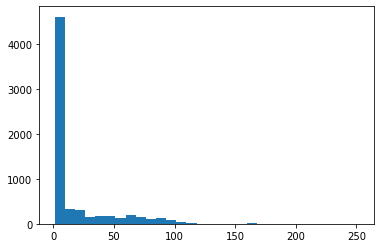

In [4]:
labels_per_image = df.groupby(['path']).size()
plt.hist(labels_per_image,bins = 30)
labels_per_image.max()

/home/pixlog/Desktop/train/data/eucaliptoAuto/69.jpg


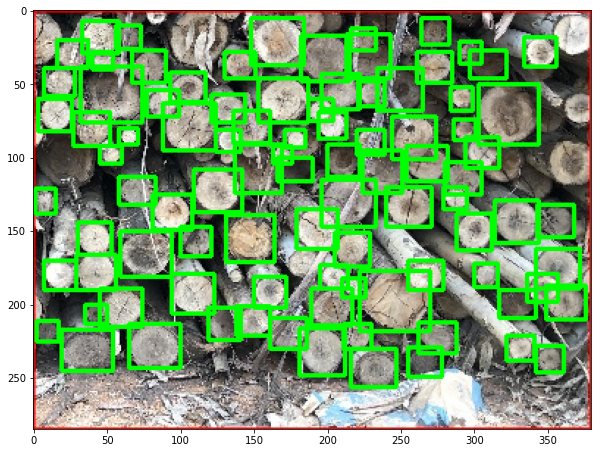

In [5]:
random_sample_show(df)
k=0

## SAVE ALL IMAGES TO VALIDATE

In [6]:
from tqdm import tqdm

def save_all_images_with_labels(df):
    unique_path = list(set(df.path))

    for k in tqdm(range(len(unique_path))):

        i = np.argwhere( np.array(df.path) == np.array(unique_path[k]))

        paths = np.array(df.path)
        mask  = paths == np.array(df.path)[i]
        img   = plt.imread(unique_path[k])


        h,w,c = img.shape
        single_image_df = df[mask[0]]

        pos = np.array(single_image_df.loc[:,["x1","x2","x3","x4","y1","y2","y3","y4"]])

        for bb in pos:
            y = (bb[[1,3,5,7]]*h).astype(int)
            x = (bb[[0,2,4,6]]*w).astype(int)
            cv2.rectangle(img,(x[0],y[0]),(x[1],y[2]),(0,255,0),2)

        prop = w/h
        if max(w,h)<600:
            if h>w:
                x = 600/w
                h *= x 
                img = cv2.resize(img, (600,int(h)), interpolation = cv2.INTER_AREA)
            else:
                x = 600/h
                w *= x 
                img = cv2.resize(img, (int(w),600), interpolation = cv2.INTER_AREA)

        cv2.imwrite("images_to_verify/"+   unique_path[k].replace('/','#*'),img[:,:,::-1])
        #plt.figure(figsize = (int(8*prop),int(8*prop)))
        #plt.imshow(img)

        #print(unique_path[k].replace('/','#*'))

COUNT SAMPLES PER TREE SPECIES

252

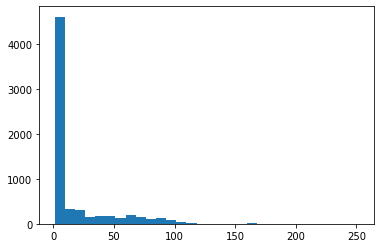

In [7]:
plt.hist(labels_per_image,bins = 30)
labels_per_image.max()

In [8]:
def summarize(df):
    
    labels_per_image = df.groupby(['path']).size()

    counts  = np.array(labels_per_image)
    paths   = np.array(labels_per_image.index)
    species = []
    total   = []

    for count,path in zip(counts,paths):
        species.append( path.split("/")[-2])
        total.append(count)

    df_species                   = pd.DataFrame({"species":species,"counts":total})
    df_img_per_species           = df_species.species.value_counts()
    df_gp_species                = df_species.groupby(['species']).sum()
    df_gp_species["images"]      = np.array(df_img_per_species)
    df_gp_species                = df_gp_species.rename(columns={'counts': 'logs'})
    df_gp_species["logs_prop"]   = df_gp_species.logs/df_gp_species.logs.sum()*100
    df_gp_species["images_prop"] = df_gp_species.images/df_gp_species.images.sum()*100
    
    return df_gp_species


In [9]:
summarize(df)

,logs,images,logs_prop,images_prop
species,,,,
cropPinus2,4284,4280,4.053862,64.555053
eucaliptoAuto,59355,1383,56.166432,20.859729
pinusAuto,39969,916,37.821853,13.815988
realCampo,2069,51,1.957853,0.769231


## MEDINDO PROPORÇÃO DETECÇÃO/IMAGEM

In [ ]:
labels_per_image = df.groupby(['path']).size()
counts           = np.array(labels_per_image)
paths            = np.array(labels_per_image.index)

i     = 10

proportions = []
for i in tqdm(range(len(paths))):
    img   = plt.imread(paths[i])
    h,w,c = img.shape
    mask  = (df.path == paths[i])
    pos   = np.array(df.loc[mask,["x1","x2","x3","x4","y1","y2","y3","y4"]])
    for bb in pos:
        y = (bb[[1,3,5,7]]*h).astype(int)
        x = (bb[[0,2,4,6]]*w).astype(int)
        det_w = (abs(x[0]-x[1]))
        det_h = (abs(y[0]-y[2]))
        proportions.append( (det_w*det_h/(h*w)).round(2) )
        
        
        #if (det_w*det_h/(h*w))< 0.01:
        #    print((det_w*det_h/(h*w)))
        #    cv2.rectangle(img,(x[0],y[0]),(x[1],y[2]),(0,255,0),2)
        #    plt.imshow(img)
        #    plt.show()
            
        #    break
            
            


 28%|██████████▌                           | 1845/6630 [00:10<00:23, 206.86it/s]

0.43    41.525424
0.44    36.864407
0.42     7.627119
0.46     3.813559
0.40     2.542373
0.38     1.271186
0.39     1.271186
0.49     1.271186
0.41     1.271186
0.45     1.271186
0.53     1.271186
Name: proportions, dtype: float64

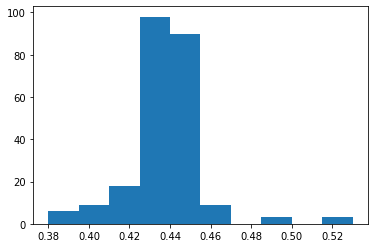

In [14]:
df_proportions  = pd.DataFrame({"proportions":proportions})
plt.hist(np.array(proportions)[np.array(proportions)>0.05])
df_proportions.proportions.value_counts()/df_proportions.proportions.value_counts().sum()*100

array([0.43, 0.43, 0.43, ..., 0.07, 0.08, 0.07])

In [ ]:
mask = df.path == path
img  = plt.imread(path)
h,w,c = img.shape
single_image_df = df[mask]
pos = np.array(single_image_df.loc[:,["x1","x2","x3","x4","y1","y2","y3","y4"]])

for bb in pos:
    y = (bb[[1,3,5,7]]*h).astype(int)
    x = (bb[[0,2,4,6]]*w).astype(int)

    img_h.append(h)
    img_w.append(w)

    size_x.append(abs(x[0]-x[1]))
    size_y.append(abs(y[0]-y[2]))